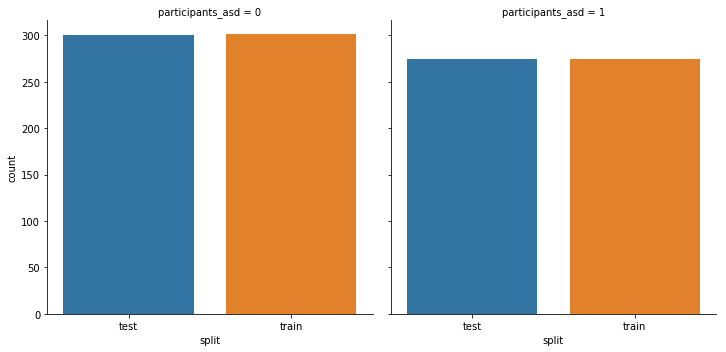

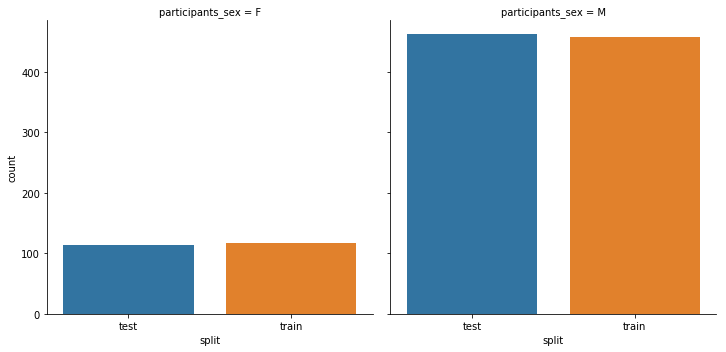

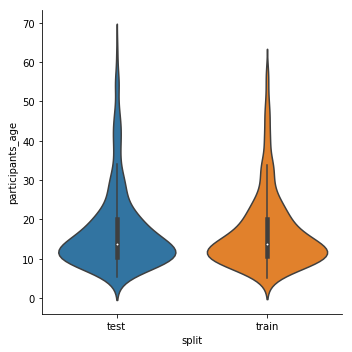

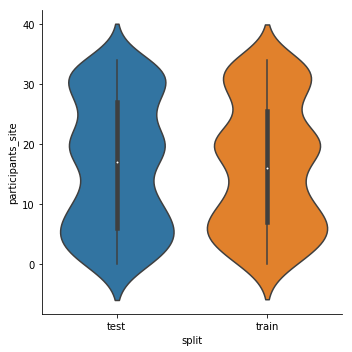

In [3]:
path = ".."

import sys
sys.path.insert(0, path)

from shutil import copyfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from problem import get_train_data
from problem import get_test_data

### Load and merge all available data

data_train, labels_train = get_train_data(path=path)
data_test, labels_test = get_test_data(path=path)
X = pd.concat([data_train, data_test], axis=0)
X.loc[:, 'participants_asd'] = np.concatenate([labels_train, labels_test])
X.loc[:, 'participants_age_deciles'] = pd.qcut(X.loc[:, 'participants_age'], 10)

stratification_columns = ['participants_asd', 'participants_sex', 'participants_age_deciles']
# stratification_columns = ['participants_asd', ]

train_is, test_is = train_test_split(np.arange(len(X)), test_size=0.5, random_state=42, stratify=X.loc[:, stratification_columns])
train = X.iloc[train_is, :]
test = X.iloc[test_is, :]
datasets = [("all", X), ("train", train), ("test", test)]

### Compare distributions

# Write split information in main dataframe
split = np.empty(len(X), dtype=np.object)
split[train_is] = "train"
split[test_is] = "test"
X.loc[:, "split"] = split

plot_size = 5

sns.factorplot(data=X, x="split", col="participants_asd", kind='count', size=plot_size)

sns.factorplot(data=X, x="split", col="participants_sex", kind='count', size=plot_size)

sns.factorplot(data=X, x="split", y="participants_age", kind='violin', size=plot_size)

sns.factorplot(data=X, x="split", y="participants_site", kind='violin', size=plot_size)

# ### Backup original train/test split and persist new split
# for name, df in datasets[1:]:
#     orig_fn = 'data/{}.csv'.format(name)
#     copyfile(orig_fn, orig_fn + '.bak')
#     pd.DataFrame(df.index).to_csv(orig_fn, header=None, index=False)

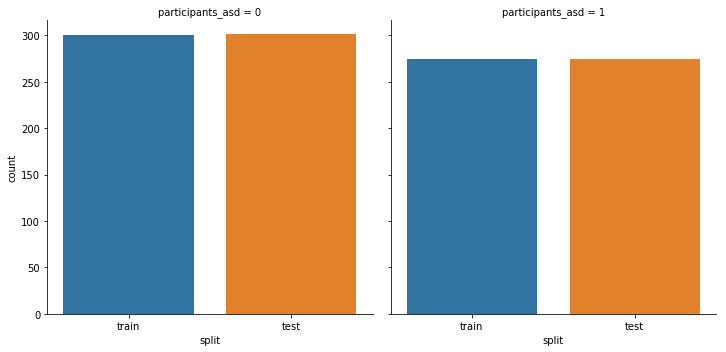

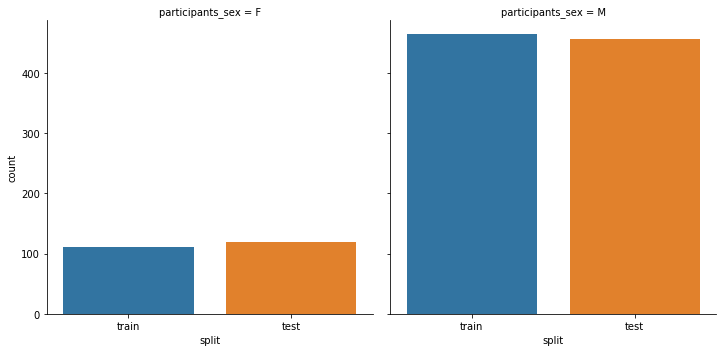

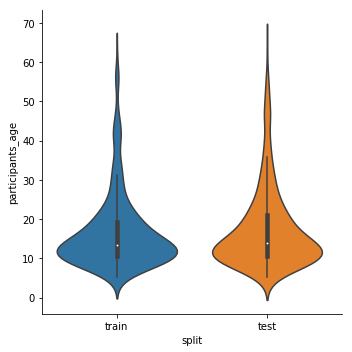

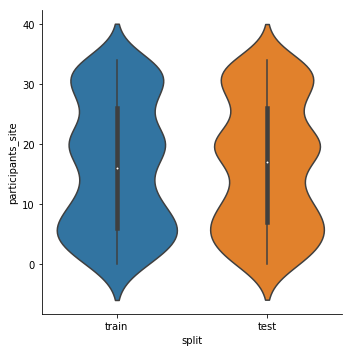

In [4]:
path = ".."

import sys
sys.path.insert(0, path)

from shutil import copyfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from problem import get_train_data
from problem import get_test_data

### Load and merge all available data

data_train, labels_train = get_train_data(path=path)
data_test, labels_test = get_test_data(path=path)
X = pd.concat([data_train, data_test], axis=0)
X.loc[:, 'participants_asd'] = np.concatenate([labels_train, labels_test])
X.loc[:, 'participants_age_deciles'] = pd.qcut(X.loc[:, 'participants_age'], 10)

# stratification_columns = ['participants_asd', 'participants_sex', 'participants_age_deciles']
stratification_columns = ['participants_asd', ]

train_is, test_is = train_test_split(np.arange(len(X)), test_size=0.5, random_state=42, stratify=X.loc[:, stratification_columns])
train = X.iloc[train_is, :]
test = X.iloc[test_is, :]
datasets = [("all", X), ("train", train), ("test", test)]

### Compare distributions

# Write split information in main dataframe
split = np.empty(len(X), dtype=np.object)
split[train_is] = "train"
split[test_is] = "test"
X.loc[:, "split"] = split

plot_size = 5

sns.factorplot(data=X, x="split", col="participants_asd", kind='count', size=plot_size)

sns.factorplot(data=X, x="split", col="participants_sex", kind='count', size=plot_size)

sns.factorplot(data=X, x="split", y="participants_age", kind='violin', size=plot_size)

sns.factorplot(data=X, x="split", y="participants_site", kind='violin', size=plot_size)

# ### Backup original train/test split and persist new split
# for name, df in datasets[1:]:
#     orig_fn = 'data/{}.csv'.format(name)
#     copyfile(orig_fn, orig_fn + '.bak')
#     pd.DataFrame(df.index).to_csv(orig_fn, header=None, index=False)